<a href="https://colab.research.google.com/github/redwild1066/ArcGIS/blob/main/Vegetaion_Final_Complete_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('/content/DATA JAN 2022 - MARCH 2023.csv')

In [ ]:
vegetation_density = 0.3 * df['Temperature'] + 0.2 * df['Humidity'] + 0.1 * df['Precipitation'] + 0.05 * df['Wind_speed']

df['Vegetation Density'] = vegetation_density

In [ ]:
max_value = vegetation_density.max()
min_value = vegetation_density.min()
rescaled_vegetation_density = (vegetation_density - min_value) / (max_value - min_value)

# Step 4: Add Rescaled Vegetation Density to the DataFrame
df['Rescaled Vegetation Density'] = rescaled_vegetation_density

In [ ]:
X = df[['Temperature', 'Humidity', 'Precipitation', 'Wind_speed']]
y = df['Rescaled Vegetation Density']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 5: Model Training and Evaluation
y_pred = rf_model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00026715498697174595


In [ ]:
# Defining the Threshold Values
dense_threshold = 0.36
sparse_threshold = 0.2

# Classifing Dense and Sparse Vegetation
df['Vegetation Class'] = 'sparse'
df.loc[df['Rescaled Vegetation Density'] >= dense_threshold, 'Vegetation Class'] = 'Dense'
df.loc[df['Rescaled Vegetation Density'] <= sparse_threshold, 'Vegetation Class'] = 'Sparse'


In [ ]:
print(df)

    Month  Days  YEAR        Date  Temperature  Min_Temperature  \
0     Jan     1  2022  2022-01-01        21.95            17.12   
1     jan     2  2022  2022-01-02        22.23            16.81   
2     Jan     3  2022  2022-01-03        21.78            16.42   
3     Jan     4  2022  2022-01-04        21.82            16.48   
4     Jan     5  2022  2022-01-05        20.19            13.77   
..    ...   ...   ...         ...          ...              ...   
450   Mar   451  2023  2023-03-27        25.69            16.69   
451   Mar   452  2023  2023-03-28        26.85            17.60   
452   Mar   453  2023  2023-03-29        26.76            18.22   
453   Mar   454  2023  2023-03-30        26.17            17.93   
454   Mar   455  2023  2023-03-31        25.82            19.02   

     Max_Temperature  Humidity  Precipitation  Surface_Pressure  Wind_speed  \
0              27.66     13.24           0.00             94.21        2.05   
1              28.35     12.76       

NOte : 
The Range between 0.2 - 0.36 is Sparse Vegetaion 
The Range between 0.36 - 0.8 is Dense Vegetaion 


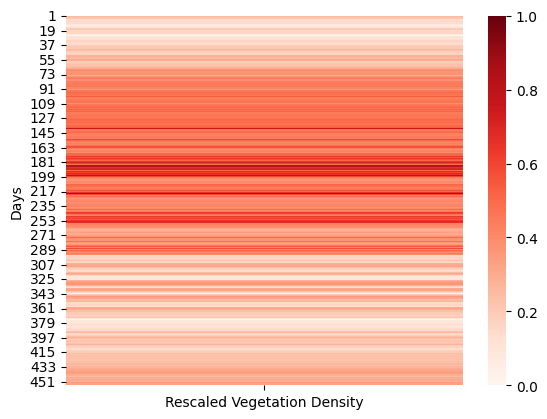

In [ ]:
import seaborn as sns
Vegetation_Class = pd.pivot_table(df, values='Rescaled Vegetation Density', index=['Days'])
sns.heatmap(data = Vegetation_Class, cmap='Reds')
print("NOte : ")
print("The Range between 0.2 - 0.36 is Sparse Vegetaion ")
print("The Range between 0.36 - 0.8 is Dense Vegetaion ")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [ ]:
# Calculating the mean vegetation density for each month
monthly_mean_density = df.groupby('Month')['Rescaled Vegetation Density'].mean()
monthly_average_class = df.groupby('Month')['Vegetation Class'].agg(lambda x: x.value_counts().index[0])

In [ ]:
print("Month\tMean Vegetation Density\tAverage Vegetation Class")
for month, mean_density in monthly_mean_density.items():
    average_class = monthly_average_class[month]
    print(f"{month}\t{mean_density:.2f}\t\t\t{average_class}")



Month	Mean Vegetation Density	Average Vegetation Class
1	0.15			Sparse
2	0.21			sparse
3	0.33			sparse
4	0.46			Dense
5	0.49			Dense
6	0.51			Dense
7	0.55			Dense
8	0.49			Dense
9	0.44			Dense
10	0.36			Dense
11	0.23			sparse
12	0.23			sparse


In [ ]:
df.to_csv('Complete_Data.csv', index=False)
from google.colab import files
files.download('Complete_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>